# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Theodorus Andang Jatmiko
- **Email:** theodorusaj1708@gmail.com
- **ID Dicoding:** MC006D5Y1490

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan layanan dibandingkan antara musim semi, musim panas, musim gugur, dan musim dingin?

2. Bagaimana perbedaan tingkat penyewaan sepeda antara hari kerja dan akhir pekan? Apakah ada hari tertentu dalam seminggu yang mencatat jumlah permintaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [186]:
uploaded = files.upload()

Saving day.csv to day (4).csv


In [187]:
uploaded = files.upload()

Saving hour.csv to hour (4).csv


In [188]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [189]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- instant: Nomor urut dari setiap data yang dicatat.
- dteday: Tanggal pencatatan data.
- season: Musim saat data diambil (1: Semi, 2: Panas, 3: Gugur, 4: Dingin).
- yr: Tahun pencatatan (0 untuk 2011, 1 untuk 2012).
- mnth: Bulan dalam setahun (1 hingga 12).
- hr: Jam dalam sehari (0 hingga 23).
- holiday: Indikator apakah hari tersebut merupakan hari libur (0: Bukan hari libur, 1: Hari libur).
- weekday: Hari dalam satu minggu (0: Minggu, 1: Senin, ..., 6: Sabtu).
- workingday: Menunjukkan apakah hari tersebut termasuk hari kerja (0: Bukan hari kerja, 1: Hari kerja).
- weathersit: Kondisi cuaca saat pencatatan data (0: Cerah, 1: Berkabut, 2: Bersalju, 3: Hujan).
- temp: Suhu aktual yang tercatat (dalam skala tertentu).
- atemp: Suhu yang dirasakan oleh manusia (dalam skala yang sama dengan temp).
- hum: Tingkat kelembapan udara dalam persentase.
- windspeed: Kecepatan angin saat data dikumpulkan.
- casual: Jumlah pengguna sepeda yang tidak memiliki registrasi.
- registered: Jumlah pengguna sepeda yang telah terdaftar.
- cnt: Total jumlah penyewaan sepeda (casual + registered).

### Assessing Data

In [190]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [191]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [192]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [193]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [194]:
# Definisi rentang nilai valid untuk masing-masing kolom dalam dataset hourly
hour_data_valid_ranges = {
    'season': (1, 4),        # Musim: 1 (Winter) hingga 4 (Spring)
    'yr': (0, 1),            # Tahun: 0 (2011) atau 1 (2012)
    'mnth': (1, 12),         # Bulan: Januari (1) hingga Desember (12)
    'hr': (0, 23),           # Jam: 0 sampai 23
    'holiday': (0, 1),       # Libur: 0 (Bukan Hari Libur), 1 (Hari Libur)
    'weekday': (0, 6),       # Hari dalam seminggu: 0 (Minggu) sampai 6 (Sabtu)
    'workingday': (0, 1),    # Hari Kerja: 0 (Bukan hari kerja), 1 (Hari kerja)
    'weathersit': (1, 4)     # Situasi cuaca: 1 (baik) hingga 4 (buruk)
}


In [195]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [196]:
invalid_data_summary = {}
for column, valid_range in hour_validation_ranges.items():
    invalid_entries = check_invalid_data(hour_df[column], valid_range).sum()
    invalid_data_summary[column] = invalid_entries

# Menampilkan ringkasan hasil validasi
for column, total_invalid in invalid_data_summary.items():
    if total_invalid > 0:
        print(f"Kolom '{column}' ditemukan {total_invalid} data yang tidak sesuai rentang valid.")
    else:
        print(f"Semua data pada kolom '{column}' berada dalam rentang yang valid.")


Semua data pada kolom 'season' berada dalam rentang yang valid.
Semua data pada kolom 'yr' berada dalam rentang yang valid.
Semua data pada kolom 'mnth' berada dalam rentang yang valid.
Semua data pada kolom 'hr' berada dalam rentang yang valid.
Semua data pada kolom 'holiday' berada dalam rentang yang valid.
Semua data pada kolom 'weekday' berada dalam rentang yang valid.
Semua data pada kolom 'workingday' berada dalam rentang yang valid.
Semua data pada kolom 'weathersit' berada dalam rentang yang valid.


In [197]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [198]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [199]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [200]:
day_validation_ranges = {
    'season': (1, 4),
    'yr': (0, 1),
    'mnth': (1, 12),
    'holiday': (0, 1),
    'weekday': (0, 6),
    'workingday': (0, 1),
    'weathersit': (1, 4),
}

In [201]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [202]:
invalid_data_summary = {}
for column, valid_range in day_validation_ranges.items():
    total_invalid = check_invalid_data(day_df[column], valid_range).sum()
    invalid_data_summary[column] = total_invalid

# Menampilkan hasil pemeriksaan
for column, total_invalid in invalid_data_summary.items():
    if total_invalid > 0:
        print(f"Kolom '{column}' terdeteksi memiliki {total_invalid} data yang berada di luar batas valid.")
    else:
        print(f"Semua data pada kolom '{column}' sudah sesuai dengan rentang nilai yang ditentukan.")


Semua data pada kolom 'season' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'yr' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'mnth' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'holiday' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'weekday' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'workingday' sudah sesuai dengan rentang nilai yang ditentukan.
Semua data pada kolom 'weathersit' sudah sesuai dengan rentang nilai yang ditentukan.


**Insight:**
- Dataset tidak mengandung missing value atau nilai yang hilang.
- Tidak ditemukan data yang duplikat dalam dataset.
- Kolom dteday masih memiliki tipe data object sehingga perlu dikonversi ke datetime64 agar lebih mudah diolah.
- Sebagian besar kolom memiliki tipe int64 atau float64, sehingga dapat langsung digunakan dalam analisis statistik tanpa banyak preprocessing.
- Perlu dilakukan pengecekan terhadap beberapa data untuk memastikan nilainya valid dan berada dalam rentang yang sesuai.

### Cleaning Data

Mengubah tipe data kolom dteday menjadi datetime64

In [203]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [204]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday diubah menjadi format datetime64


## Exploratory Data Analysis (EDA)

### Explore hour_df

In [205]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [206]:
# Analisis Total Penyewaan dan Statistik Cuaca per Musim
hour_df.groupby("season").agg({
    "cnt": "sum",  # Total jumlah penyewaan sepeda per musim
    "temp": ["max", "min", "mean", "std"],  # Statistik suhu per musim
    "hum": ["max", "min", "mean", "std"]    # Statistik kelembapan per musim
})


cnt  temp                            hum                          
            sum   max   min      mean       std  max   min      mean       std
season                                                                        
1        471348  0.72  0.02  0.299147  0.118726  1.0  0.00  0.581348  0.199403
2        918589  0.94  0.16  0.544663  0.139233  1.0  0.16  0.627022  0.205364
3       1061129  1.00  0.38  0.706410  0.093903  1.0  0.16  0.633167  0.177866
4        841613  0.76  0.14  0.423138  0.122167  1.0  0.16  0.667124  0.178149

In [207]:
# Analisis Penggunaan Sepeda Berdasarkan Hari (Hari Kerja vs Akhir Pekan)
hour_df.groupby(by="weekday").cnt.sum().reset_index()


,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [208]:
# Rata-rata Penyewaan Harian (Weekdays vs Weekend)
hour_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean"]
}).reset_index()

weekday     cnt            
              sum        mean
0       0  444027  177.468825
1       1  455503  183.744655
2       2  469109  191.238891
3       3  473048  191.130505
4       4  485395  196.436665
5       5  487790  196.135907
6       6  477807  190.209793

In [209]:
# Distribusi Penggunaan Berdasarkan Hari
hour_df.groupby('weekday').cnt.sum().reset_index()


,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [210]:
# Penyewaan Sepeda Berdasarkan Bulan
hour_df.groupby('mnth').cnt.sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


**Insight:**
- Musim dan Penggunaan Sepeda: Jumlah penyewaan tertinggi terjadi saat musim panas, sedangkan musim dingin mencatatkan jumlah penyewaan terendah.
- Pola Penggunaan Berdasarkan Hari: Pada hari kerja, mayoritas pengguna merupakan pelanggan terdaftar yang menggunakan sepeda untuk keperluan komuter. Sebaliknya, di akhir pekan, lebih banyak penyewa kasual yang memanfaatkannya untuk rekreasi.
- Perbandingan Hari Kerja vs Akhir Pekan: Secara rata-rata, jumlah penyewaan lebih tinggi saat akhir pekan. Namun, dalam total keseluruhan, penyewaan pada hari kerja tetap lebih banyak.
- Pola Penggunaan Bulanan: Jumlah penyewaan tertinggi terjadi pada bulan-bulan musim panas, seperti Juni, Juli, dan Agustus, sedangkan jumlah penyewaan terendah terjadi di musim dingin, khususnya pada Desember, Januari, dan Februari.


### Explore day_df

In [211]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [212]:
# Analisis Penggunaan Sepeda Berdasarkan Musim
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})


cnt      temp                                     hum            \
            sum       max       min      mean       std       max       min   
season                                                                        
1        471348  0.572500  0.059130  0.297748  0.102735  0.948261  0.000000   
2        918589  0.808333  0.253043  0.544405  0.122650  0.922500  0.254167   
3       1061129  0.861667  0.469167  0.706309  0.070848  0.939565  0.360000   
4        841613  0.657500  0.220833  0.422906  0.107834  0.972500  0.333478   

                            
            mean       std  
season                      
1       0.582903  0.151880  
2       0.626948  0.152841  
3       0.633482  0.119349  
4       0.668719  0.131248

In [213]:
# Analisis Penggunaan Sepeda Berdasarkan Hari (Hari Kerja vs Akhir Pekan)
day_df.groupby(by="weekday").cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [214]:
# Rata-rata Penyewaan Harian (Weekdays vs Weekend)
day_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean"]
}).reset_index()

weekday     cnt             
              sum         mean
0       0  444027  4228.828571
1       1  455503  4338.123810
2       2  469109  4510.663462
3       3  473048  4548.538462
4       4  485395  4667.259615
5       5  487790  4690.288462
6       6  477807  4550.542857

In [215]:
# Distribusi Penggunaan Berdasarkan Hari
day_df.groupby('weekday').cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [216]:
# Penyewaan Sepeda Berdasarkan Bulan
day_df.groupby('mnth').cnt.sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


**Insight:**
- Kesamaan antara day_df dan hour_df: Struktur kedua dataset hampir identik, dengan perbedaan utama hanya pada kolom hour yang terdapat di hour_df.
- Pola Penggunaan Berdasarkan Musim: Jumlah penyewaan tertinggi terjadi selama musim panas, sementara musim dingin mencatatkan angka terendah.
- Perbandingan Hari Kerja dan Akhir Pekan: Rata-rata penyewaan sepeda lebih tinggi di akhir pekan, namun jika dilihat secara total, jumlah penyewaan lebih besar pada hari kerja.
- Pola Penggunaan Harian: Pengguna terdaftar lebih mendominasi pada hari kerja karena kebutuhan transportasi, sementara pengguna kasual lebih banyak menggunakan sepeda saat akhir pekan untuk rekreasi.
- Tren Penggunaan Sepeda Berdasarkan Bulan: Penyewaan tertinggi terjadi pada bulan-bulan musim panas seperti Juni, Juli, dan Agustus, sedangkan bulan dengan penyewaan terendah berada di musim dingin, yakni Desember, Januari, dan Februari.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Pertanyaan 1: Bagaimana perbandingan penggunaan layanan antara musim semi, musim panas, musim gugur, dan musim dingin?

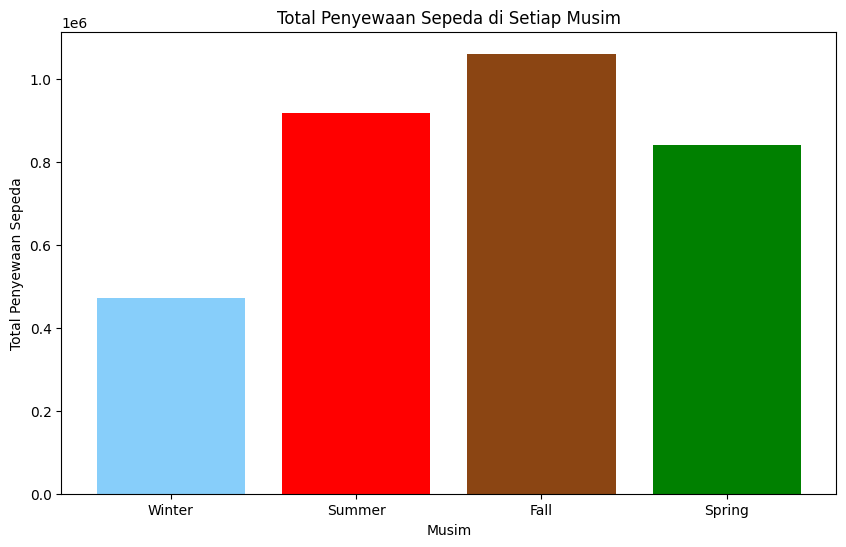

In [217]:
# Warna yang mewakili setiap musim
warna_musim = {
    1: "#87CEFA",  # Winter (Biru Muda)
    2: "#FF0000",  # Summer (Merah)
    3: "#8B4513",  # Fall (Cokelat)
    4: "#008000"   # Spring (Hijau)
}

# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
total_penyewaan_per_musim = day_df.groupby('season')['cnt'].sum().reset_index()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(
    ['Winter', 'Summer', 'Fall', 'Spring'],
    total_penyewaan_per_musim['cnt'],
    color=[warna_musim[season] for season in total_penyewaan_per_musim['season']]
)

# Menyesuaikan tampilan
plt.title("Total Penyewaan Sepeda di Setiap Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

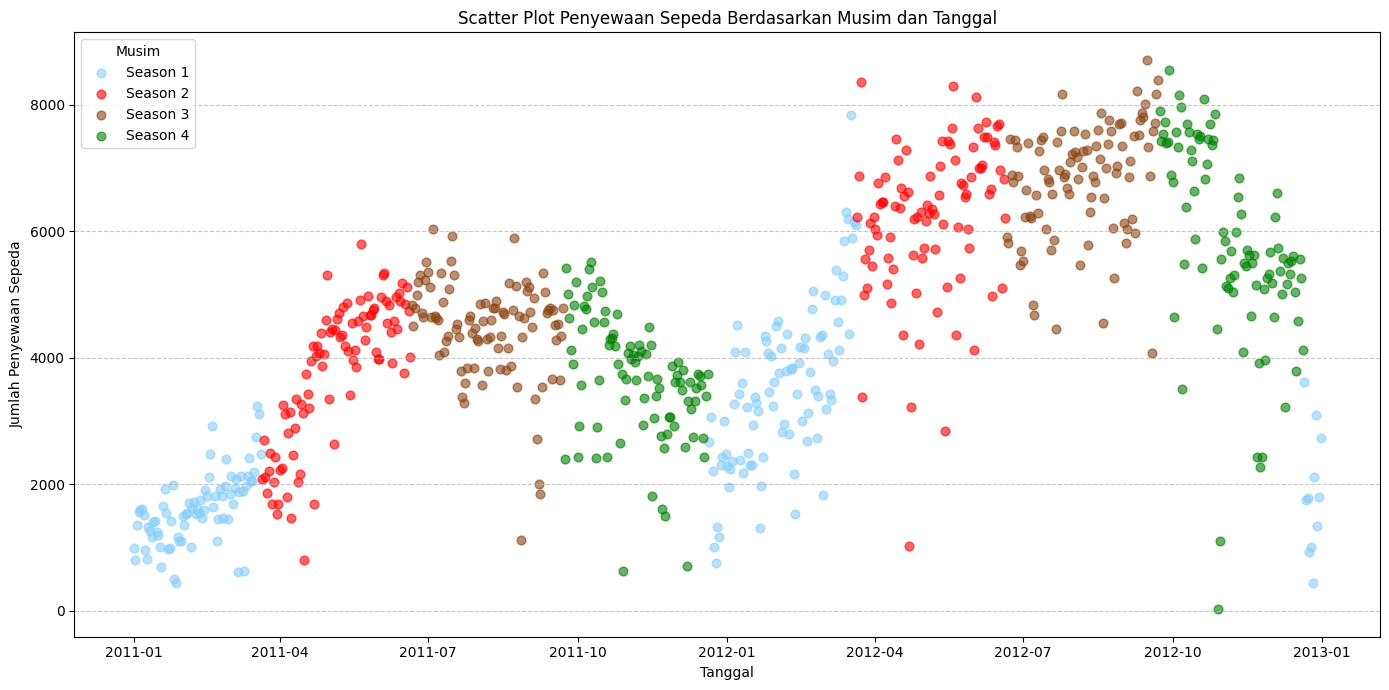

In [218]:
# Warna untuk setiap musim
colors = {
    1: "#87CEFA",  # Winter (Biru Muda)
    2: "#FF0000",  # Summer (Merah)
    3: "#8B4513",  # Fall (Cokelat)
    4: "#008000"   # Spring (Hijau)
}

# Mengelompokkan data berdasarkan season, weathersit, dan dteday
jumlah_perhari = day_df.groupby(['season', 'weathersit', 'dteday']).agg({'cnt': 'sum'}).reset_index()
jumlah_perhari['dteday'] = pd.to_datetime(jumlah_perhari['dteday'])

# Membuat scatter plot
plt.figure(figsize=(14, 7))

for season in sorted(jumlah_perhari['season'].unique()):
    subset = jumlah_perhari[jumlah_perhari['season'] == season]
    plt.scatter(subset['dteday'], subset['cnt'],
                color=colors[season],
                label=f"Season {season}",
                alpha=0.6, s=40)  # s=ukuran titik

# Menyesuaikan tampilan diagram
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Scatter Plot Penyewaan Sepeda Berdasarkan Musim dan Tanggal")
plt.legend(title="Musim", loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()


**Insight :**
Analisis Penggunaan Sepeda Berdasarkan Musim
- Musim gugur (Fall - 3) mencatat jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas (Summer - 2).
Sebaliknya, musim dingin (Winter - 4) memiliki tingkat penyewaan sepeda terendah.
- Visualisasi dalam bentuk diagram batang memperlihatkan distribusi penyewaan sepeda di setiap musim dengan jelas, menegaskan bahwa musim panas dan gugur memberikan kontribusi terbesar terhadap total penggunaan sepeda.



### Pertanyaan 2: Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda antara jam sibuk (pagi hingga sore) dan jam sepi (tengah malam hingga pagi)?

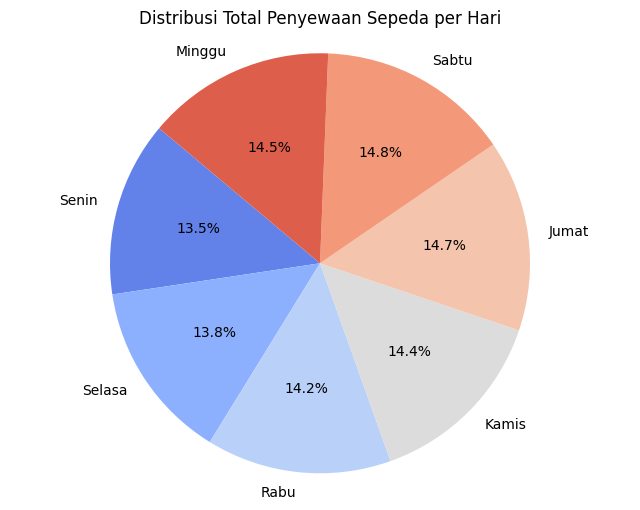

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping nama hari
nama_hari = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
hour_df['nama_hari'] = hour_df['weekday'].map(lambda x: nama_hari.get(x, 'Tidak Diketahui'))

# Menghitung total penyewaan per hari
total_per_hari = hour_df.groupby('nama_hari')['cnt'].sum().reindex(
    ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
)

# Membuat pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('coolwarm', len(total_per_hari))
plt.pie(total_per_hari, labels=total_per_hari.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Total Penyewaan Sepeda per Hari')
plt.axis('equal')  # Agar pie chart jadi bulat
plt.show()


<ipython-input-220-a0ad48a526d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kategori_hari', y='cnt', data=day_df, palette="viridis")


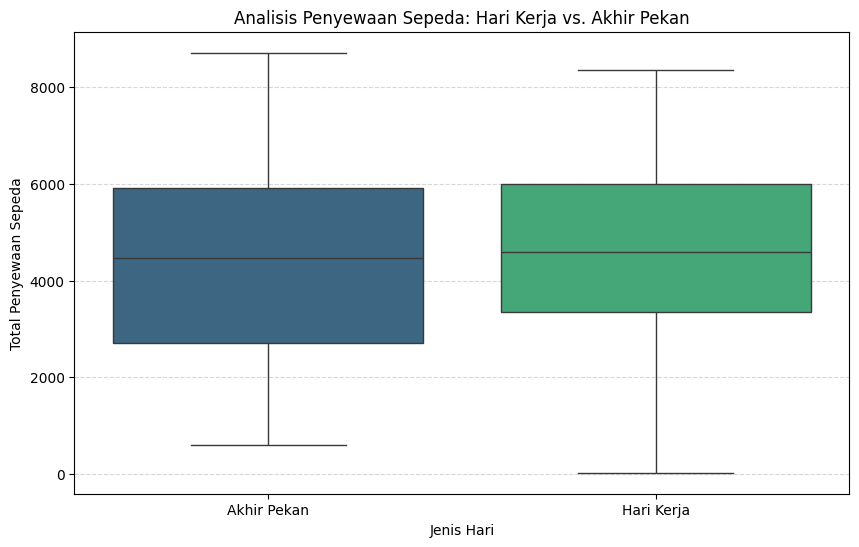

In [220]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
day_df['kategori_hari'] = day_df['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Membuat Box Plot untuk membandingkan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='kategori_hari', y='cnt', data=day_df, palette="viridis")

# Menyesuaikan tampilan diagram
plt.title('Analisis Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Total Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insight :**
Analisis Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan
- Hari dengan jumlah penyewaan sepeda tertinggi adalah Sabtu.
- Dari pie chart, terlihat bahwa rata-rata penggunaan sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan akhir pekan. Visualisasi ini membantu menunjukkan distribusi penggunaan sepeda di kedua kategori hari tersebut dengan jelas.

## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana pola penggunaan layanan di setiap musim?

Berdasarkan hasil visualisasi, musim gugur (Fall) mencatat jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas (Summer). Kemungkinan besar, hal ini disebabkan oleh kondisi cuaca yang lebih nyaman dibandingkan musim semi (Spring), yang memiliki tingkat penggunaan sepeda lebih rendah. Secara keseluruhan, musim gugur dan musim panas menjadi periode dengan kontribusi terbesar dalam penyewaan sepeda.

- Bagaimana pola distribusi penyewaan sepeda antara hari kerja dan akhir pekan?

Penyewaan sepeda cenderung lebih banyak terjadi pada hari kerja dibandingkan akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering dimanfaatkan untuk aktivitas sehari-hari, seperti bepergian ke kantor atau sekolah, daripada sekadar digunakan untuk keperluan rekreasi.

In [221]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.14
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.17.0.34.53
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.41.0
bigquery-magics==0.8.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.0
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


In [222]:
hour_df.to_csv('main_data.csv', index=False)